In [23]:
import os
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')


# Cargar archivo .env
# Ruta relativa desde el notebook hasta el .env
dotenv_path = '../generadores/.env'  #

# Cargar el archivo .env desde la ruta especificada
load_dotenv(dotenv_path=dotenv_path)

# Leer variables de entorno
username = os.getenv("USUARIO_DB")
password = os.getenv("CLAVE_BD")

# Validar que se cargaron bien
print("Usuario:", username)
print("Contraseña cargada:", bool(password))  # No imprime la clave, pero verifica si existe

if not username or not password:
    raise ValueError("Las variables de entorno USUARIO_DB o CLAVE_BD no están definidas")

# Cadena de conexión
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=upgradeserver-vf.database.windows.net;'
    'DATABASE=Banco;'
    f'UID={username};'
    f'PWD={password}'
)

# Conexión
conn = pyodbc.connect(conn_str)



Usuario: vanesa
Contraseña cargada: True


In [10]:
# Consulta de prueba
query = "SELECT TOP 5 * FROM usuarios" 
df_usuarios = pd.read_sql(query, conn)
df_usuarios.head()

,id,nombre,apellido,estado_civil,dni,nacionalidad,fecha_nacimiento,direccion,codigo_postal,provincia,telefono,email,es_moroso
0,1,Ana,García,Soltera,12345678A,Argentina,1985-04-12,Calle Falsa 123,1000,Buenos Aires,3412345678,ana.garcia@email.com,False
1,2,Juan,Pérez,Casado,23456789B,Argentina,1978-09-23,Av. Siempre Viva 742,2000,Córdoba,3519876543,juan.perez@email.com,False
2,3,Lucía,Fernández,Soltera,34567890C,Argentina,1990-01-15,Calle Luna 55,3000,Rosario,3411234567,lucia.fernandez@email.com,False
3,4,Carlos,Rodríguez,Divorciado,45678901D,Argentina,1965-12-05,Boulevard Oro 100,4000,Mendoza,2615551234,carlos.rodriguez@email.com,False
4,5,Sofía,López,Casada,56789012E,Argentina,1988-07-30,Paseo del Sol 23,5000,Salta,3874123456,sofia.lopez@email.com,False


In [11]:

# Consulta de prueba
query = "SELECT TOP 5 * FROM activos" 
df_activos = pd.read_sql(query, conn)
df_activos.head()

,id,usuario_id,tipo_activo,descripcion,monto
0,8,6,plan de jubilación,Activo financiero.,232225.49
1,10,7,ahorro,Activo financiero.,17461.03
2,11,8,plan de jubilación,Activo financiero.,39493.79
3,17,11,plan de jubilación,Activo financiero.,13038.66
4,21,12,inversiones,Activo financiero.,220494.27


In [12]:

# Consulta de prueba
query = "SELECT TOP 5 * FROM creditos" 
df_creditos = pd.read_sql(query, conn)
df_creditos.head()

,id,usuario_id,monto,fecha_inicio,fecha_fin,estado
0,1,1,22905.76,2021-05-03,2025-04-12,Pagado
1,2,1,41092.46,2023-02-15,2026-01-30,Activo
2,3,2,14227.25,2024-04-16,2024-10-13,Moroso
3,4,2,43894.30,2022-09-21,2026-08-31,Activo
4,5,3,14301.29,2024-04-30,2027-04-15,Moroso


In [13]:

# Consulta de prueba
query = "SELECT TOP 5 * FROM cuentas_bancarias" 
df_cuentas = pd.read_sql(query, conn)
df_cuentas.head()

,id,usuario_id,numero_cuenta,tipo_cuenta,saldo
0,1,1,ES3130457829687829864747,ahorro,21387.36
1,2,2,ES4064531790235106659615,nómina,65356.81
2,3,2,ES1134649345867669157851,empresa,93538.72
3,4,3,ES5399834580394434733233,nómina,26849.60
4,5,3,ES9008699930569074866448,corriente,55160.85


In [14]:

# Consulta de prueba
query = "SELECT TOP 5 * FROM monedas_digitales" 
df_monedas = pd.read_sql(query, conn)
df_monedas.head()

,id,usuario_id,tipo_moneda,cantidad,valor_actual
0,2,1,USDT,6095.762152,1.00
1,16,13,SOL,146.161122,23.30
2,22,15,DOT,393.235081,7.97
3,27,18,ETH,2.972848,3390.26
4,45,29,XRP,18395.084351,1.56


In [15]:

# Consulta de prueba
query = "SELECT TOP 5 * FROM empleos" 
df_empleos = pd.read_sql(query, conn)
df_empleos.head()

,id,usuario_id,nombre_empresa,cargo,salario,antiguedad_anios
0,1,1,Banca Privada OLMJ S.L.N.E,Auxiliar de servicio de abordo,70433.00,1
1,2,2,Antón y Andrés S.A.,Director de servicios de bienestar social,78807.14,15
2,3,3,Grupo Rivas S.A.T.,Operador de máquinas de movimiento de tierras,36303.28,6
3,4,4,Alimentación Cuervo y asociados S.Com.,Chef,73489.36,34
4,5,5,Manufacturas Españolas S.A.,Bailarín,25128.98,27


##### Comprobamos los tipos

In [16]:
df_usuarios.dtypes

id                   int64
nombre              object
apellido            object
estado_civil        object
dni                 object
nacionalidad        object
fecha_nacimiento    object
direccion           object
codigo_postal       object
provincia           object
telefono            object
email               object
es_moroso             bool
dtype: object

In [17]:
df_empleos.dtypes

id                    int64
usuario_id            int64
nombre_empresa       object
cargo                object
salario             float64
antiguedad_anios      int64
dtype: object

In [18]:
df_activos.dtypes

id               int64
usuario_id       int64
tipo_activo     object
descripcion     object
monto          float64
dtype: object

In [19]:
df_creditos.dtypes

id                int64
usuario_id        int64
monto           float64
fecha_inicio     object
fecha_fin        object
estado           object
dtype: object

In [22]:
#cambiamos fecha_inicio y fecha_fin a datetime
df_creditos['fecha_inicio'] = pd.to_datetime(df_creditos['fecha_inicio'])
df_creditos['fecha_fin'] = pd.to_datetime(df_creditos['fecha_fin'])

In [20]:
df_cuentas.dtypes

id                 int64
usuario_id         int64
numero_cuenta     object
tipo_cuenta       object
saldo            float64
dtype: object

In [21]:
df_monedas.dtypes

id                int64
usuario_id        int64
tipo_moneda      object
cantidad        float64
valor_actual    float64
dtype: object

#### EDA

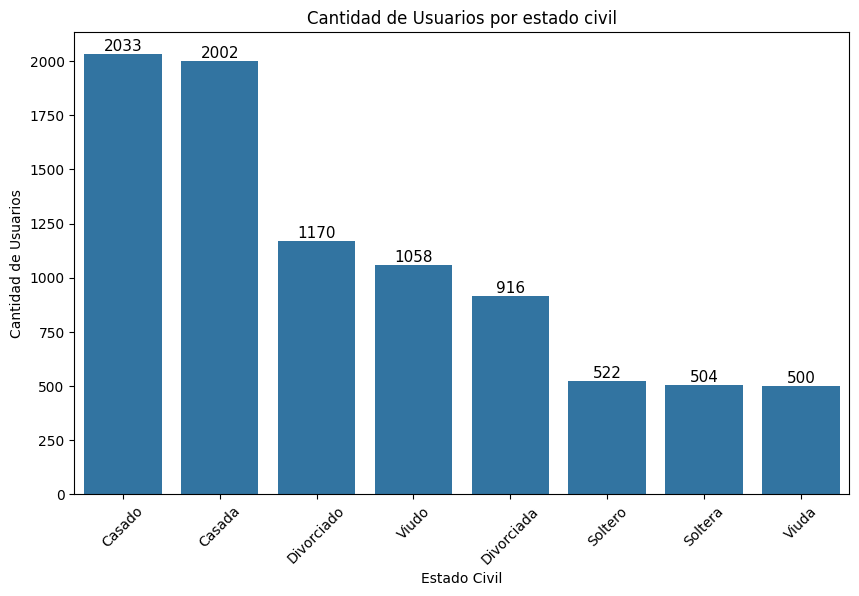

In [35]:
# Consulta para obtener todos los usuarios
query = "SELECT * FROM usuarios"
df_usuarios = pd.read_sql(query, conn)

# Gráfico de barras de la cantidad de usuarios por estado civil
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_usuarios, x='estado_civil', order=df_usuarios['estado_civil'].value_counts().index)
plt.title('Cantidad de Usuarios por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)

# Añadir etiquetas en las columnas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.show()

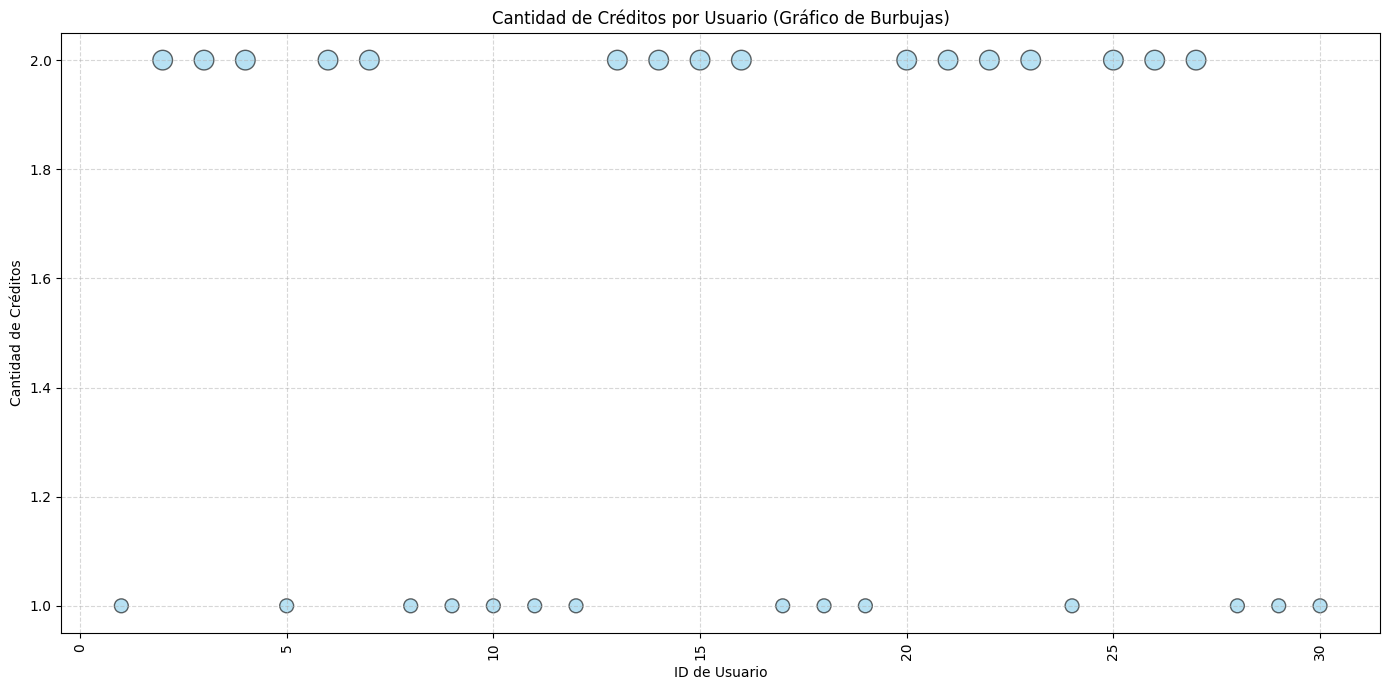

In [44]:
# Obtener todos los créditos
query = "SELECT * FROM creditos"
df_creditos = pd.read_sql(query, conn)

# Agrupar por usuario_id y contar la cantidad de créditos por cada uno
creditos_por_usuario = df_creditos.groupby('usuario_id').size().reset_index(name='creditos')

# Gráfico de burbujas: mostrar solo los primeros 30 usuarios
plt.figure(figsize=(14, 7))
plt.scatter(
    creditos_por_usuario['usuario_id'].head(30),
    creditos_por_usuario['creditos'].head(30),
    s=creditos_por_usuario['creditos'].head(30) * 100,  # tamaño de burbuja
    alpha=0.6,
    color='skyblue',
    edgecolors='k'
)
plt.title('Cantidad de Créditos por Usuario (Gráfico de Burbujas)')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



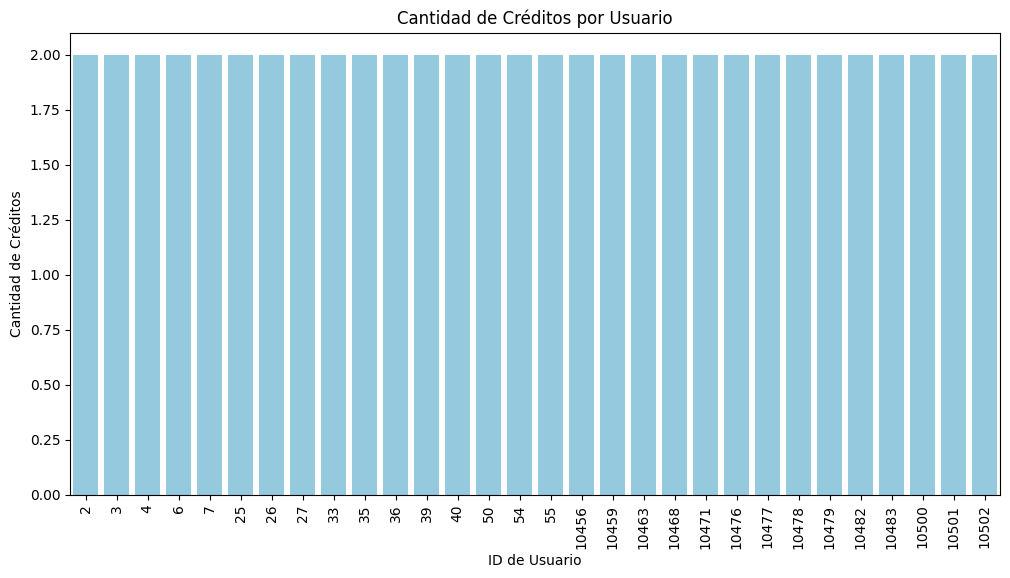

In [42]:
#calcular la cantidad de creditos por usuario
creditos_por_usuario = df_creditos['usuario_id'].value_counts().reset_index()
creditos_por_usuario.columns = ['usuario_id', 'creditos']
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=creditos_por_usuario.head(30),  # muestra los 30 primeros para mejor visualización
    x='usuario_id',
    y='creditos',
    color='skyblue'
)
plt.title('Cantidad de Créditos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Créditos')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#creditos por usuari
creditos_por_usuario = creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')

# Top 20 usuarios con más créditos
top_creditos = creditos_por_usuario.sort_values('cantidad_creditos', ascending=False).head(20)

sns.barplot(data=top_creditos, x='usuario_id', y='cantidad_creditos', palette='Blues_d')
plt.title("Top 20 Usuarios con más Créditos")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#distribucion de creditos
sns.histplot(creditos_por_usuario['cantidad_creditos'], bins=30, kde=True)
plt.title("Distribución del Número de Créditos por Usuario")
plt.xlabel("Cantidad de Créditos")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
#total de monto de creditos por usuario
monto_creditos = creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos')

sns.histplot(monto_creditos['monto_total_creditos'], bins=30, kde=True)
plt.title("Distribución del Monto Total de Créditos")
plt.xlabel("Monto Total de Créditos")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
#creditos por tipo de empleo
creditos_empleo = creditos.merge(empleo, on='usuario_id')
promedio_credito = creditos_empleo.groupby('tipo_empleo')['monto'].mean().reset_index()

sns.barplot(data=promedio_credito, x='tipo_empleo', y='monto', palette='Set2')
plt.title("Promedio de Monto de Crédito por Tipo de Empleo")
plt.xticks(rotation=45)
plt.ylabel("Promedio de Monto")
plt.show()


In [ ]:
#monedas digitales por tipo
sns.countplot(data=monedas_digitales, x='tipo_moneda', order=monedas_digitales['tipo_moneda'].value_counts().index)
plt.title("Cantidad de Monedas Digitales por Tipo")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#monedas digitales por usuario
monedas_por_usuario = monedas_digitales.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
plt.figure(figsize=(12, 6))
sns.barplot(data=monedas_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.xticks(rotation=90)
plt.show()


In [ ]:
#valor total de criptoactivos por usuario
valor_cripto = monedas_digitales.groupby('usuario_id')['valor_usd'].sum().reset_index(name='total_cripto')

sns.histplot(valor_cripto['total_cripto'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Monedas Digitales")
plt.show()


In [ ]:
#Cuentas Bancarias por Usuario

cuentas_por_usuario = cuentas_bancarias.groupby('usuario_id').size().reset_index(name='cantidad_cuentas')

sns.histplot(cuentas_por_usuario['cantidad_cuentas'], bins=10)
plt.title("Cantidad de Cuentas Bancarias por Usuario")
plt.show()

In [ ]:
#Activos Financieros por Usuario

activos_por_usuario = activos_financieros.groupby('usuario_id')['valor_estimado'].sum().reset_index(name='valor_total_activos')

sns.histplot(activos_por_usuario['valor_total_activos'], bins=30, kde=True)
plt.title("Distribución de Valor Total en Activos Financieros")
plt.show()

In [ ]:
#Correlación Financiera

df_merged = (
    usuarios
    .merge(creditos.groupby('usuario_id')['monto'].sum().reset_index(name='monto_total_creditos'), on='usuario_id', how='left')
    .merge(activos_por_usuario, on='usuario_id', how='left')
    .merge(valor_cripto, on='usuario_id', how='left')
    .merge(cuentas_por_usuario, on='usuario_id', how='left')
)

sns.heatmap(df_merged[['monto_total_creditos', 'valor_total_activos', 'total_cripto', 'cantidad_cuentas']].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre Variables Financieras")
plt.show()

In [ ]:
#Relación Créditos vs Activos

sns.scatterplot(data=df_merged, x='valor_total_activos', y='monto_total_creditos')
plt.title("Créditos vs Activos Financieros")
plt.xlabel("Total de Activos Financieros")
plt.ylabel("Total de Créditos")
plt.grid(True)
plt.show()

In [ ]:
# Créditos por Provincia

creditos_provincia = creditos.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id')
creditos_provincia = creditos_provincia.groupby('provincia').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_provincia.sort_values('cantidad_creditos', ascending=False), 
            x='provincia', y='cantidad_creditos', palette='crest')
plt.xticks(rotation=45)
plt.title("Cantidad de Créditos por Provincia")
plt.ylabel("N° Créditos")
plt.xlabel("Provincia")
plt.tight_layout()
plt.show()

In [ ]:
#Créditos por Nacionalidad

creditos_nacionalidad = creditos.merge(usuarios[['usuario_id', 'nacionalidad']], on='usuario_id')
creditos_nacionalidad = creditos_nacionalidad.groupby('nacionalidad').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_nacionalidad.sort_values('cantidad_creditos', ascending=False).head(10),
            x='nacionalidad', y='cantidad_creditos', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Nacionalidades con más Créditos")
plt.tight_layout()
plt.show()

In [ ]:
#¿Los morosos tienen más créditos?

usuarios_mora = usuarios[['usuario_id', 'moroso']]
creditos_mora = creditos.merge(usuarios_mora, on='usuario_id')
creditos_mora = creditos_mora.groupby('moroso').size().reset_index(name='cantidad_creditos')

sns.barplot(data=creditos_mora, x='moroso', y='cantidad_creditos', palette='flare')
plt.title("Cantidad de Créditos según si el Usuario es Moroso")
plt.xlabel("Moroso (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Créditos")
plt.show()

In [ ]:
#Morosidad según Edad

usuarios_mora_edad = usuarios[['usuario_id', 'edad', 'moroso']]
# Agrupar por rangos de edad
usuarios_mora_edad['rango_edad'] = pd.cut(usuarios_mora_edad['edad'], bins=[18, 25, 35, 45, 55, 65, 100],
                                          labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+'])

mora_por_edad = usuarios_mora_edad.groupby('rango_edad')['moroso'].mean().reset_index()

sns.barplot(data=mora_por_edad, x='rango_edad', y='moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Rango de Edad")
plt.ylim(0, 1)
plt.show()

In [ ]:
#Morosidad según Provincia

mora_provincia = usuarios.groupby('provincia')['moroso'].mean().reset_index()

sns.barplot(data=mora_provincia.sort_values('moroso', ascending=False), 
            x='provincia', y='moroso', palette='rocket')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Provincia")
plt.ylabel("Proporción de Morosos")
plt.xlabel("Provincia")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Nacionalidad

mora_nacionalidad = usuarios.groupby('nacionalidad')['moroso'].mean().reset_index()

# Top 10 nacionalidades con más morosidad
top_nacionalidad = mora_nacionalidad.sort_values('moroso', ascending=False).head(10)

sns.barplot(data=top_nacionalidad, x='nacionalidad', y='moroso', palette='flare')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Nacionalidad (Top 10)")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Estado Civil

mora_estado_civil = usuarios.groupby('estado_civil')['moroso'].mean().reset_index()

sns.barplot(data=mora_estado_civil.sort_values('moroso', ascending=False),
            x='estado_civil', y='moroso', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Estado Civil")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Morosidad según Edad

usuarios['rango_edad'] = pd.cut(
    usuarios['edad'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
)

mora_edad = usuarios.groupby('rango_edad')['moroso'].mean().reset_index()

sns.barplot(data=mora_edad, x='rango_edad', y='moroso', palette='magma')
plt.title("Tasa de Morosidad por Rango de Edad")
plt.ylabel("Proporción de Morosos")
plt.ylim(0, 1)
plt.show()

In [ ]:
#Morosidad según Ingresos

Si tienes la tabla empleo con ingresos, puedes hacer:

usuarios_empleo = usuarios.merge(empleo[['usuario_id', 'ingresos']], on='usuario_id')

sns.boxplot(data=usuarios_empleo, x='moroso', y='ingresos', palette='Set3')
plt.title("Distribución de Ingresos según Morosidad")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("Ingresos")
plt.show()

In [ ]:
#Morosidad por Tipo de Empleo

usuarios_empleo = usuarios.merge(empleo[['usuario_id', 'tipo_empleo']], on='usuario_id')

mora_empleo = usuarios_empleo.groupby('tipo_empleo')['moroso'].mean().reset_index()

sns.barplot(data=mora_empleo.sort_values('moroso', ascending=False),
            x='tipo_empleo', y='moroso', palette='cubehelix')
plt.xticks(rotation=45)
plt.title("Tasa de Morosidad por Tipo de Empleo")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
#Créditos y Morosidad combinados

#¿Tienen más créditos los morosos?

creditos_usuario = creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos')
usuarios_creditos = usuarios.merge(creditos_usuario, on='usuario_id', how='left')
usuarios_creditos['cantidad_creditos'] = usuarios_creditos['cantidad_creditos'].fillna(0)

sns.boxplot(data=usuarios_creditos, x='moroso', y='cantidad_creditos', palette='Set2')
plt.title("Cantidad de Créditos según Morosidad")
plt.xticks([0, 1], ['No Moroso', 'Moroso'])
plt.ylabel("N° Créditos")
plt.show()

In [ ]:
#Distribución de Edad según Morosidad (Densidad)

sns.kdeplot(data=usuarios, x='edad', hue='moroso', common_norm=False, fill=True, palette='coolwarm')
plt.title("Distribución de Edad según Morosidad")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

In [ ]:
#Heatmap cruzado: Morosidad por Provincia y Estado Civil

pivot = usuarios.pivot_table(index='provincia', columns='estado_civil', values='moroso', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("Morosidad Promedio por Provincia y Estado Civil")
plt.ylabel("Provincia")
plt.xlabel("Estado Civil")
plt.tight_layout()
plt.show()

In [ ]:
#Preparación de datos combinados

# Unir usuarios con empleo, creditos y activos
df = usuarios.merge(empleo[['usuario_id', 'ingresos', 'tipo_empleo']], on='usuario_id', how='left')
df = df.merge(creditos.groupby('usuario_id').size().reset_index(name='cantidad_creditos'), on='usuario_id', how='left')
df = df.merge(activos_financieros[['usuario_id', 'valor_activos']], on='usuario_id', how='left')

df['cantidad_creditos'] = df['cantidad_creditos'].fillna(0)
df['valor_activos'] = df['valor_activos'].fillna(0)

In [ ]:
#Preprocesamiento

# Variables categóricas a codificar
cat_vars = ['provincia', 'estado_civil', 'tipo_empleo', 'nacionalidad']
df[cat_vars] = df[cat_vars].fillna("Desconocido")

# Codificar etiquetas
for col in cat_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Escalamiento
features = ['edad', 'ingresos', 'provincia', 'estado_civil', 'tipo_empleo', 'cantidad_creditos', 'valor_activos']
X_scaled = StandardScaler().fit_transform(df[features])

In [ ]:
#Clustering (por ejemplo, KMeans)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_riesgo'] = kmeans.fit_predict(X_scaled)

sns.countplot(x='cluster_riesgo', data=df, palette='tab10')
plt.title("Distribución de Usuarios por Clúster de Riesgo")
plt.show()

# Perfil de clusters
df.groupby('cluster_riesgo')[features].mean()

In [ ]:
# Etiqueta
y = df['moroso']
X = df[features]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo: Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='barh', title='Importancia de las Variables')
plt.show()


In [ ]:
#Validación cruzada

from sklearn.model_selection import cross_val_score

# Validación cruzada (5 folds)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Accuracy promedio con validación cruzada: {scores.mean():.4f}")

In [ ]:
#Búsqueda de hiperparámetros con GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

# Evaluar con mejores parámetros
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [ ]:
#ROC Curve y AUC

from sklearn.metrics import roc_curve, auc

# Probabilidades
y_scores = best_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
#usuarios con más de 3 créditos
usuarios_mas_creditos = usuarios[usuarios['usuario_id'].isin(creditos_por_usuario[creditos_por_usuario['cantidad_creditos'] > 3]['usuario_id'])]
usuarios_mas_creditos[['usuario_id', 'nombre', 'apellido', 'cantidad_creditos']].sort_values(by='cantidad_creditos', ascending=False).head(10)


In [ ]:
#usuarios por provincia
usuarios_provincia = usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_provincia.sort_values('cantidad_usuarios', ascending=False), 
            x='provincia', y='cantidad_usuarios', palette='viridis')
plt.title("Cantidad de Usuarios por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Usuarios")
plt.show()


In [ ]:
#usuario si es moroso o no
usuarios['moroso'] = usuarios['moroso'].astype(int)  # Asegurarse de que es int
sns.countplot(data=usuarios, x='moroso', palette='Set1')


In [ ]:
#usuario por nacionalidad
usuarios_nacionalidad = usuarios.groupby('nacionalidad').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_nacionalidad.sort_values('cantidad_usuarios', ascending=False).head(10),
            x='nacionalidad', y='cantidad_usuarios', palette='viridis')
plt.title("Top 10 Nacionalidades con más Usuarios")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#cantidad de usuarios por provincia
usuarios_provincia = usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')
sns.barplot(data=usuarios_provincia.sort_values('cantidad_usuarios', ascending=False),

            x='provincia', y='cantidad_usuarios', palette='viridis')
plt.title("Cantidad de Usuarios por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Usuarios")
plt.show()


In [ ]:
#cantidad de monedas digitales por usuario
monedas_por_usuario = monedas_digitales.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()

In [ ]:
#antiguedad de monedas digitales por usuario
monedas_antiguedad = monedas_digitales.groupby('usuario_id')['fecha_creacion'].min().reset_index()
monedas_antiguedad['antiguedad'] = (pd.to_datetime('today') - monedas_antiguedad['fecha_creacion']).dt.days
sns.histplot(monedas_antiguedad['antiguedad'], bins=30, kde=True)
plt.title("Antigüedad de Monedas Digitales por Usuario")
plt.xlabel("Días desde Creación")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#cantidad de monedas digitales por usuario
monedas_por_usuario = monedas_digitales.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuario")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()

In [ ]:
#antiguedad de empleos por usuario
empleos_antiguedad = empleos.groupby('usuario_id')['fecha_inicio'].min().reset_index()
empleos_antiguedad['antiguedad'] = (pd.to_datetime('today') - empleos_antiguedad['fecha_inicio']).dt.days
sns.histplot(empleos_antiguedad['antiguedad'], bins=30, kde=True)
plt.title("Antigüedad de Empleos por Usuario")
plt.xlabel("Días desde Inicio")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#empleos mas antiguedad mayor creditos de usuarios
empleos_antiguedad_creditos = empleos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'usuario_id': 'count'}).reset_index()
empleos_antiguedad_creditos.columns = ['usuario_id', 'fecha_inicio', 'cantidad_creditos']
empleos_antiguedad_creditos['antiguedad'] = (pd.to_datetime('today') - empleos_antiguedad_creditos['fecha_inicio']).dt.days


In [ ]:
#mayor antiguedad en emplos mas activos
empleos_mas_activos = empleos.groupby('usuario_id').size().reset_index(name='cantidad_empleos')
empleos_mas_activos = empleos_mas_activos.sort_values('cantidad_empleos', ascending=False).head(20)
sns.barplot(data=empleos_mas_activos, x='usuario_id', y='cantidad_empleos', palette='viridis')
plt.title("Top 20 Usuarios con más Empleos Activos")
plt.xlabel("ID de Usuario")
plt.show()

In [ ]:
#mayor antiguedad mas activos financieros
activos_mas_activos = activos_financieros.groupby('usuario_id').size().reset_index(name='cantidad_activos')
activos_mas_activos = activos_mas_activos.sort_values('cantidad_activos', ascending=False).head(20)
sns.barplot(data=activos_mas_activos, x='usuario_id', y='cantidad_activos', palette='viridis')
plt.title("Top 20 Usuarios con más Activos Financieros")
plt.xlabel("ID de Usuario")
plt.show()

In [ ]:
#mayor antiguedad en el empleo mayor cantidad de creditos
empleos_creditos = empleos.merge(creditos, on='usuario_id', how='left')
empleos_creditos = empleos_creditos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'usuario_id': 'count'}).reset_index()
empleos_creditos.columns = ['usuario_id', 'fecha_inicio', 'cantidad_creditos']
empleos_creditos['antiguedad'] = (pd.to_datetime('today') - empleos_creditos['fecha_inicio']).dt.days
sns.scatterplot(data=empleos_creditos, x='antiguedad', y='cantidad_creditos', color='blue')
plt.title("Antigüedad del Empleo vs Cantidad de Créditos")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Cantidad de Créditos")
plt.show()


In [ ]:
#mayor antiguedad en el empleo mayor cantidad de activos financieros
empleos_activos = empleos.merge(activos_financieros, on='usuario_id', how='left')
empleos_activos = empleos_activos.groupby('usuario_id').agg({'fecha_inicio': 'min', 'valor_estimado': 'sum'}).reset_index()
empleos_activos.columns = ['usuario_id', 'fecha_inicio', 'valor_total_activos']
empleos_activos['antiguedad'] = (pd.to_datetime('today') - empleos_activos['fecha_inicio']).dt.days
sns.scatterplot(data=empleos_activos, x='antiguedad', y='valor_total_activos', color='green')
plt.title("Antigüedad del Empleo vs Valor Total de Activos Financieros")
plt.xlabel("Antigüedad (días)")
plt.ylabel("Valor Total de Activos Financieros")
plt.show()

In [ ]:
# usuarios mas jovenes mas modenas digitales
usuarios_jovenes_monedas = usuarios[usuarios['edad'] < 30]
monedas_jovenes = monedas_digitales[monedas_digitales['usuario_id'].isin(usuarios_jovenes_monedas['usuario_id'])]
monedas_jovenes_por_usuario = monedas_jovenes.groupby('usuario_id').size().reset_index(name='cantidad_monedas')
sns.barplot(data=monedas_jovenes_por_usuario, x='usuario_id', y='cantidad_monedas', palette='viridis')
plt.title("Cantidad de Monedas Digitales por Usuarios Jóvenes (<30 años)")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Monedas")
plt.show()


In [ ]:
#edad media creditos por provincia
edad_creditos_provincia = creditos.merge(usuarios[['usuario_id', 'edad', 'provincia']], on='usuario_id', how='left')
edad_creditos_provincia = edad_creditos_provincia.groupby('provincia')['edad'].mean().reset_index()
sns.barplot(data=edad_creditos_provincia.sort_values('edad', ascending=False), 
            x='provincia', y='edad', palette='viridis')
plt.title("Edad Media de Usuarios con Créditos por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Edad Media")
plt.show()


In [ ]:
#edad media creditos por nacionalidad
edad_creditos_nacionalidad = creditos.merge(usuarios[['usuario_id', 'edad', 'nacionalidad']], on='usuario_id', how='left')
edad_creditos_nacionalidad = edad_creditos_nacionalidad.groupby('nacionalidad')['edad'].mean().reset_index()
sns.barplot(data=edad_creditos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='nacionalidad', y='edad', palette='viridis')
plt.title("Edad Media de Usuarios con Créditos por Nacionalidad (Top 10)")
plt.xlabel("Nacionalidad")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros por provincia
edad_creditos_monedas_activos_provincia = (
    creditos.merge(usuarios[['usuario_id', 'edad', 'provincia']], on='usuario_id', how='left')
    .merge(monedas_digitales[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(activos_financieros[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_provincia = edad_creditos_monedas_activos_provincia.groupby('provincia').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_provincia.sort_values('edad', ascending=False), 
            x='provincia', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Edad Media")
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros por nacionalidad
edad_creditos_monedas_activos_nacionalidad = (
    creditos.merge(usuarios[['usuario_id', 'edad', 'nacionalidad']], on='usuario_id', how='left')
    .merge(monedas_digitales[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(activos_financieros[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_nacionalidad = edad_creditos_monedas_activos_nacionalidad.groupby('nacionalidad').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='nacionalidad', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros por Nacionalidad (Top 10)")
plt.xlabel("Nacionalidad")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#edad media creditos, monedas digitales y activos financieros
edad_creditos_monedas_activos_nacionalidad = (
    creditos.merge(usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
    .merge(monedas_digitales[['usuario_id', 'valor_usd']], on='usuario_id', how='left')
    .merge(activos_financieros[['usuario_id', 'valor_estimado']], on='usuario_id', how='left')
)
edad_creditos_monedas_activos_nacionalidad = edad_creditos_monedas_activos_nacionalidad.groupby('Usuarios').agg({
    'edad': 'mean',
    'valor_usd': 'sum',
    'valor_estimado': 'sum'
}).reset_index()
sns.barplot(data=edad_creditos_monedas_activos_nacionalidad.sort_values('edad', ascending=False).head(10),
            x='usuario', y='edad', palette='viridis')
plt.title("Edad Media, Valor Total de Monedas Digitales y Activos Financieros (Top 10)")
plt.xlabel("Usuarios")
plt.ylabel("Edad Media")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tipos de cuentas bancarias por edad
cuentas_bancarias['fecha_apertura'] = pd.to_datetime(cuentas_bancarias['fecha_apertura'])
cuentas_bancarias['antiguedad'] = (pd.to_datetime('today') - cuentas_bancarias['fecha_apertura']).dt.days
sns.boxplot(data=cuentas_bancarias, x='tipo_cuenta', y='antiguedad', palette='Set2')
plt.title("Antigüedad de Cuentas Bancarias por Tipo de Cuenta")
plt.xlabel("Tipo de Cuenta")
plt.ylabel("Antigüedad (días)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#tipo de cuentas bancarias por provincia
cuentas_provincia = cuentas_bancarias.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
cuentas_provincia = cuentas_provincia.groupby(['provincia', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')
plt.figure(figsize=(12, 6))
sns.barplot(data=cuentas_provincia, x='provincia', y='cantidad_cuentas', hue='tipo_cuenta', palette='viridis')
plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de cuentas bancarias por nacionalidad
cuentas_nacionalidad = cuentas_bancarias.merge(usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
cuentas_nacionalidad = cuentas_nacionalidad.groupby(['nacionalidad', 'tipo_cuenta']).size().reset_index(name='cantidad_cuentas')
plt.figure(figsize=(12, 6))
sns.barplot(data=cuentas_nacionalidad, x='nacionalidad', y='cantidad_cuentas', hue='tipo_cuenta', palette='viridis')
plt.title("Cantidad de Cuentas Bancarias por Nacionalidad y Tipo de Cuenta")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#tipos de activos financieros por nacionalidad
activos_nacionalidad = activos_financieros.merge(usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
activos_nacionalidad = activos_nacionalidad.groupby(['nacionalidad', 'tipo_activo']).size().reset_index(name='cantidad_activos')
plt.figure(figsize=(12, 6))
sns.barplot(data=activos_nacionalidad, x='nacionalidad', y='cantidad_activos', hue='tipo_activo', palette='viridis')
plt.title("Cantidad de Activos Financieros por Nacionalidad y Tipo de Activo")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de Activos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Activo')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de activos financieros por edad
activos_edad = activos_financieros.merge(usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
activos_edad = activos_edad.groupby(['edad', 'tipo_activo']).size().reset_index(name='cantidad_activos')
plt.figure(figsize=(12, 6))
sns.barplot(data=activos_edad, x='edad', y='cantidad_activos', hue='tipo_activo', palette='viridis')
plt.title("Cantidad de Activos Financieros por Edad y Tipo de Activo")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Activos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Activo')
plt.tight_layout()
plt.show()

In [ ]:
#tipo de creditos por edad
creditos_edad = creditos.merge(usuarios[['usuario_id', 'edad']], on='usuario_id', how='left')
creditos_edad = creditos_edad.groupby(['edad', 'tipo_credito']).size().reset_index(name='cantidad_creditos')
plt.figure(figsize=(12, 6))
sns.barplot(data=creditos_edad, x='edad', y='cantidad_creditos', hue='tipo_credito', palette='viridis')
plt.title("Cantidad de Créditos por Edad y Tipo de Crédito")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Créditos")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Crédito')
plt.tight_layout()
plt.show()

In [ ]:
#tipos de cuentas bancarias por provincia
cuentas_bancarias_provincia = cuentas_bancarias.groupby('provincia')['tipo_cuenta'].value_counts().unstack().fillna(0)
cuentas_bancarias_provincia.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Cantidad de Cuentas Bancarias por Provincia y Tipo de Cuenta")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Cuentas")
plt.xticks(rotation=45)
plt.legend(title='Tipo de Cuenta')
plt.tight_layout()
plt.show()

In [ ]:
#estado de los creditos
creditos_estado = creditos.groupby('estado')['usuario_id'].count().reset_index()
sns.barplot(data=creditos_estado, x='estado', y='usuario_id', palette='viridis')
plt.title("Cantidad de Créditos por Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Cantidad de Créditos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de créditos por provincia y estado
creditos_provincia_estado = creditos.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
creditos_provincia_estado = creditos_provincia_estado.groupby(['provincia', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(creditos_provincia_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Provincia y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de creditos por nacionalidad y estado
creditos_nacionalidad_estado = creditos.merge(usuarios[['usuario_id', 'nacionalidad']], on='usuario_id', how='left')
creditos_nacionalidad_estado = creditos_nacionalidad_estado.groupby(['nacionalidad', 'estado']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(creditos_nacionalidad_estado, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Créditos'})
plt.title("Mapa de Calor de Créditos por Nacionalidad y Estado")
plt.xlabel("Estado del Crédito")
plt.ylabel("Nacionalidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de calor de activos financieros por provincia y tipo
activos_provincia_tipo = activos_financieros.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
activos_provincia_tipo = activos_provincia_tipo.groupby(['provincia', 'tipo_activo']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(activos_provincia_tipo, annot=True, fmt='g', cmap='viridis', cbar_kws={'label': 'Cantidad de Activos'})
plt.title("Mapa de Calor de Activos Financieros por Provincia y Tipo")
plt.xlabel("Tipo de Activo")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#mapa de españa con provincias y cantidad de usuarios
import geopandas as gpd
import matplotlib.pyplot as plt
# Cargar el mapa de España
mapa_espana = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mapa_espana = mapa_espana[mapa_espana['name'] == 'Spain']
# Agrupar usuarios por provincia
usuarios_provincia = usuarios.groupby('provincia').size().reset_index(name='cantidad_usuarios')
# Unir el mapa con los datos de usuarios
mapa_espana = mapa_espana.merge(usuarios_provincia, left_on='name', right_on='provincia', how='left')
mapa_espana['cantidad_usuarios'] = mapa_espana['cantidad_usuarios'].fillna(0)
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_espana.boundary.plot(ax=ax, linewidth=1)
mapa_espana.plot(column='cantidad_usuarios', ax=ax, legend=True,
                 legend_kwds={'label': "Cantidad de Usuarios por Provincia",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title("Mapa de España con Cantidad de Usuarios por Provincia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [ ]:
#mapa de españa con mas creditos por provincia
creditos_provincia = creditos.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
creditos_provincia = creditos_provincia.groupby('provincia').size().reset_index(name='cantidad_creditos')
# Unir el mapa con los datos de créditos
mapa_espana_creditos = mapa_espana.merge(creditos_provincia, left_on='name', right_on='provincia', how='left')
mapa_espana_creditos['cantidad_creditos'] = mapa_espana_creditos['cantidad_creditos'].fillna(0)
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_espana_creditos.boundary.plot(ax=ax, linewidth=1)
mapa_espana_creditos.plot(column='cantidad_creditos', ax=ax, legend=True,
                 legend_kwds={'label': "Cantidad de Créditos por Provincia",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title("Mapa de España con Cantidad de Créditos por Provincia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [ ]:
#mapa de españa con mas activos financieros
activos_provincia = activos_financieros.merge(usuarios[['usuario_id', 'provincia']], on='usuario_id', how='left')
activos_provincia = activos_provincia.groupby('provincia').size().reset_index(name='cantidad_activos')
# Unir el mapa con los datos de activos financieros
mapa_espana_activos = mapa_espana.merge(activos_provincia, left_on='name', right_on='provincia', how='left')
mapa_espana_activos['cantidad_activos'] = mapa_espana_activos['cantidad_activos'].fillna(0)
# Graficar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_espana_activos.boundary.plot(ax=ax, linewidth=1)
mapa_espana_activos.plot(column='cantidad_activos', ax=ax, legend=True,
                 legend_kwds={'label': "Cantidad de Activos Financieros por Provincia",
                              'orientation': "horizontal"},
                 cmap='viridis', missing_kwds={"color": "lightgrey"})
plt.title("Mapa de España con Cantidad de Activos Financieros por Provincia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()
                         